In [1]:
import EntityGenerator
%load_ext autoreload
%autoreload 2

import cPickle, os, sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

from ddlite import *
np.random.seed(seed=1701)

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (18,6)

In [2]:
E = EntityGenerator.generateRelations("AGR2_blood_biomarker.txt")

In [3]:
feats = None

DDL = DDLiteModel(E, feats)
print "Extracted {} features for each of {} mentions".format(DDL.num_feats(), DDL.num_candidates())

Extracted 7055 features for each of 287 mentions


In [5]:
uids = []
gt = []
for entity in E:
    uids.append(entity.uid)
count = 1
while count < len(uids) + 1:
    if(count%3 == 0):
        gt.append(1)
    elif(count%2 == 0):
        gt.append(-1)
    else:
        gt.append(0)
    count += 1

DDL.update_gt(gt[:50], uids=uids[:50])
DDL.set_holdout(validation_frac=0.5)

In [6]:
DDL.open_mindtagger(num_sample=100, width='100%', height=1200)

Making sure MindTagger is installed. Hang on!


In [7]:
DDL.add_mindtagger_tags()
DDL.update_gt(gt[50:], uids=uids[50:])

In [12]:
#PUT LABELLING FUNCTIONS HERE
def LF_alwaysTrue(m):
    return 1

In [16]:
LFs = [LF_alwaysTrue]
DDL.apply_lfs(LFs, clear = False)

Begin training for rate=0.01, mu=1e-07
	Learning epoch = 0	Gradient mag. = 0.671751
	Learning epoch = 250	Gradient mag. = 2.458285
Final gradient magnitude for rate=0.01, mu=1e-07: 1.462
Begin training for rate=0.01, mu=1e-09
	Learning epoch = 0	Gradient mag. = 0.445720
	Learning epoch = 250	Gradient mag. = 0.455026
	Learning epoch = 500	Gradient mag. = 0.441612
	Learning epoch = 750	Gradient mag. = 0.428904
	Learning epoch = 1000	Gradient mag. = 0.416864
	Learning epoch = 1250	Gradient mag. = 0.405457
	Learning epoch = 1500	Gradient mag. = 0.394648
	Learning epoch = 1750	Gradient mag. = 0.384406
	Learning epoch = 2000	Gradient mag. = 0.374699
	Learning epoch = 2250	Gradient mag. = 0.365498
	Learning epoch = 2500	Gradient mag. = 0.356774
	Learning epoch = 2750	Gradient mag. = 0.348502
Final gradient magnitude for rate=0.01, mu=1e-09: 0.341
Begin training for rate=0.01, mu=1e-05
	Learning epoch = 0	Gradient mag. = 0.445720
	Learning epoch = 250	Gradient mag. = 0.455027
	Learning epoch =

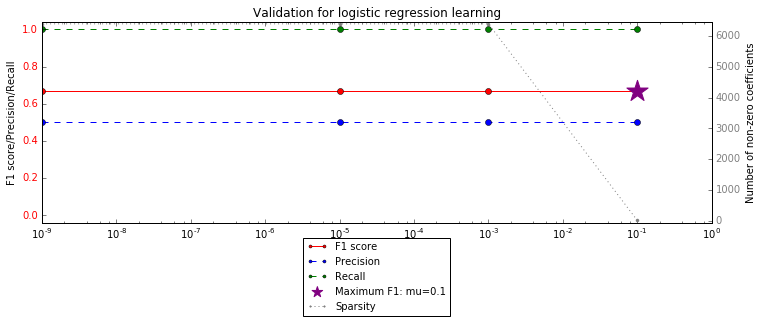

CPU times: user 6.69 s, sys: 636 ms, total: 7.32 s
Wall time: 6.56 s


<ddlite.ModelLog instance at 0x7f3da80ee368>

In [17]:
matplotlib.rcParams['figure.figsize'] = (12,4)
mu_seq = np.ravel([1e-9, 1e-5, 1e-3, 1e-1])
lf_opts = {'sample': False, 'verbose': True}
model_opts = {'sample': False, 'n_iter': 3000, 'alpha': 0.5, 'mu': mu_seq, 'bias': False, 'verbose': True}
%time DDL.train_model(method='lr', lf_opts=lf_opts, model_opts=model_opts)

In [18]:
idxs, gt = DDL.get_labeled_ground_truth(subset=DDL.holdout())
acc_feats = np.mean(DDL.get_predicted(subset=DDL.holdout()) == gt)
acc_lfs = np.mean(DDL.get_lf_predicted(subset=DDL.holdout()) == gt)
print "LF accuracy: {:.3f}\nFull model accuracy: {:.3f}".format(acc_lfs, acc_feats)
print DDL.get_lf_predicted(subset=DDL.holdout)

LF accuracy: 0.485
Full model accuracy: 0.485
